In [66]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [67]:
df = pd.read_csv('stocks_classification.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [68]:
df.head()

,date,open,high,low,close,trade,volume,Name,up,down,up_ema,down_ema,RS,RSI,EMA
0,8/2/2013,15.07,15.12,14.63,14.75,No,8407500,AAL,0.00,0.00,0.00,0.00,0.0,0.0,14.75
1,11/2/2013,14.89,15.01,14.26,14.46,No,8882000,AAL,0.00,0.29,0.00,0.29,0.0,0.0,14.46
2,12/2/2013,14.45,14.51,14.10,14.27,No,8126000,AAL,0.00,0.19,0.00,0.19,0.0,0.0,14.27
3,13/2/2013,14.30,14.94,14.25,14.66,Yes,10259500,AAL,0.39,0.00,0.39,0.00,0.0,0.0,14.66
4,14/2/2013,14.94,14.96,13.16,13.99,No,31879900,AAL,0.00,0.67,0.00,0.67,0.0,0.0,13.99


In [69]:
NVDA = df.drop(df[df.Name != 'NVDA'].index)

In [70]:
dev_ema = [0] * 1259
high_or_low = [0] * 1259
movement = [0] * 1259
movement_sign = [0] * 1259
rsi_sign = [0] * 1259

for i in range(1259):
    dev_ema[i] = NVDA.iloc[i, 13] - NVDA.iloc[i, 4]
    
    if dev_ema[i] > 0:
        high_or_low[i] = 1
    if dev_ema[i] < 0:
        high_or_low[i] = -1
    
    if (NVDA.iloc[i, 8] != 0) and (NVDA.iloc[i, 9] == 0):
        movement[i] = NVDA.iloc[i, 8]
        movement_sign[i] = 1
    if (NVDA.iloc[i, 9] != 0) and (NVDA.iloc[i, 8] == 0):
        movement[i] = -1 * NVDA.iloc[i, 9]
        movement_sign[i] = -1
    if (NVDA.iloc[i, 13] >= 70):
        rsi_sign[i] = 1
    if (NVDA.iloc[i, 13] <= 30):
        rsi_sign[i] = -1

NVDA['High or Low'] = high_or_low
NVDA['DEV from EMA'] = dev_ema
NVDA['Movement'] = movement
NVDA['Movement sign'] = movement_sign
NVDA['RSI sign'] = rsi_sign

Here, trade is Yes if on a given day, close > open. Indicates that by buying the stock when it opens, user will be better off by the end of the day. First, we aim to visually understand the distribuition. 

In [94]:
NVDA = NVDA.drop(NVDA[NVDA.RSI == 0].index)
NVDA = NVDA.drop(NVDA[NVDA[Movement sign] == 0].index)
NVDA

SyntaxError: invalid syntax (<ipython-input-94-041f604229f3>, line 2)

In [72]:
y = pd.DataFrame(NVDA["trade"])
X = pd.DataFrame(NVDA[["DEV from EMA", "RSI sign"]])

Set up the code with Train and Test datasets:

In [73]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1000, 1) (1000, 2)
Test Set  : (250, 1) (250, 2)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [74]:
# Summary Statistics for Response
y_train["trade"].value_counts()

Yes    541
No     459
Name: trade, dtype: int64

In [75]:
# Summary Statistics for Predictors
X_train.describe()

,DEV from EMA,RSI sign
count,1000.000000,1000.000000
mean,1.864865,0.195000
std,59.571419,0.612658
min,-186.518882,-1.000000
25%,-13.763605,0.000000
50%,21.301622,0.000000
75%,42.677666,1.000000
max,78.465048,1.000000


In [76]:
Trade = pd.DataFrame(NVDA['Movement sign'])  # Response
Dev = pd.DataFrame(NVDA['DEV from EMA'])    # Predictor

In [77]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish

# Decision Tree with max depth = 2
tree_CA_SP_d2 = DecisionTreeClassifier(max_depth = 2)



In [78]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = Trade
X = Dev

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1000, 1) (1000, 1)
Test Set  : (250, 1) (250, 1)


In [79]:
# Fit the tree with max depth 2
tree_CA_SP_d2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

IndexError: list index out of range

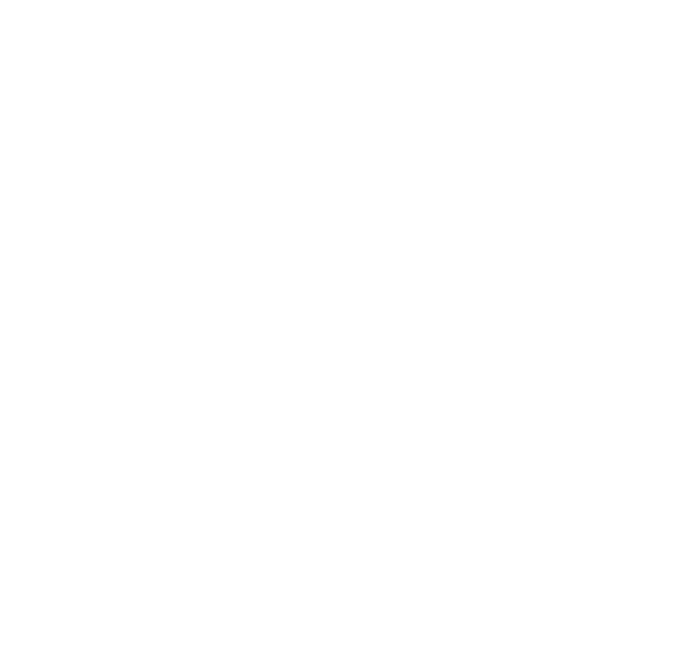

In [80]:
# Plot the tree with max depth 2
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree_CA_SP_d2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

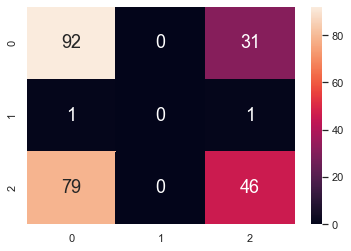

In [82]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree_CA_SP_d2.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [83]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_CA_SP_d2.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.552

TPR Test :	 0.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 1.0


In [84]:
RSI = pd.DataFrame(NVDA['RSI'])    # Predictor

In [85]:
tree_CA_SP_d2_2 = DecisionTreeClassifier(max_depth = 2)

In [86]:
y = Trade
X = RSI

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1000, 1) (1000, 1)
Test Set  : (250, 1) (250, 1)


In [87]:
tree_CA_SP_d2_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

IndexError: list index out of range

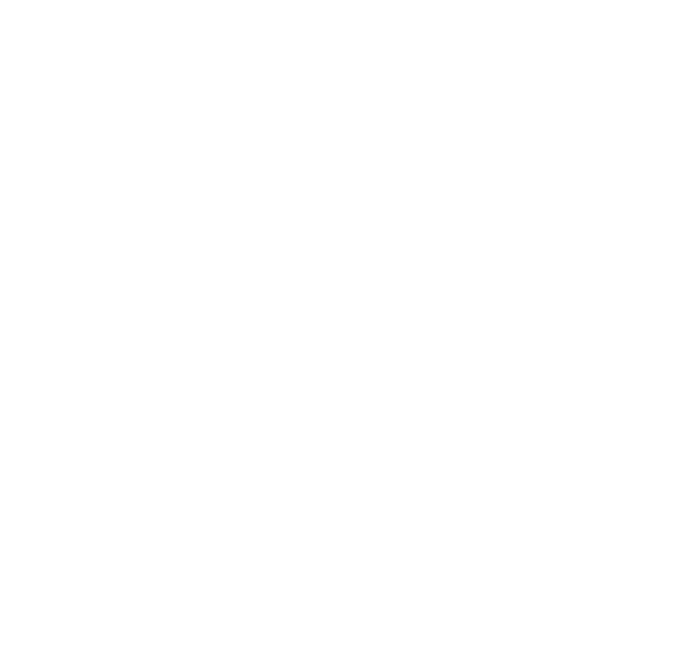

In [88]:
f = plt.figure(figsize=(12,12))
plot_tree(tree_CA_SP_d2_2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

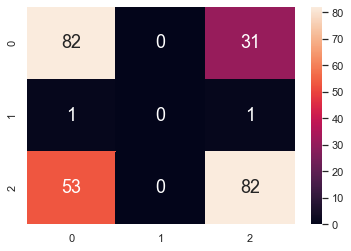

In [89]:
y_test_pred = tree_CA_SP_d2_2.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [90]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_CA_SP_d2_2.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.656

TPR Test :	 0.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 1.0
